In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython
import torch
import noisereduce as nr
from noisereduce.noisereduce import SpectralGateStationary
from noisereduce.torchgate import TorchGate as TG
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [8]:
audio_file = "whale_data/data/train/train7.aiff"

In [9]:
data, sr = librosa.load(audio_file)


In [10]:
sr

22050

In [11]:
def reduce_with_nf(data):
    reduced_noise = nr.reduce_noise(y=data, sr=sr)
    return reduced_noise

def reduce_with_torch(data):
    tg = TG(sr=sr, nonstationary=False)
    data = data.reshape((1,data.shape[0]))
    denoised = tg(torch.from_numpy(data))
    denoised = np.array(denoised)
    denoised = denoised.reshape((denoised.shape[1],))
    return denoised


In [12]:
denoised = reduce_with_torch(data)
denoised_then_reduced = reduce_with_nf(denoised)
IPython.display.Audio(data=denoised_then_reduced,rate=sr)

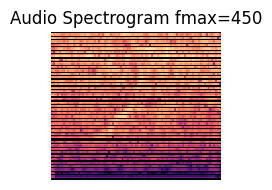

In [48]:
n_fft = 1024
hop_length = 512
S = librosa.feature.melspectrogram(y=data,
                                   sr=sr,
                                   fmax=450 # Limiting the spectrogram to only 500 Hz frequency
                                   )
S_db = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(2,2)) 
librosa.display.specshow(S_db,
                         x_axis='time',
                         y_axis='linear',
                         sr=sr,
                         )
plt.title("Audio Spectrogram fmax=450")
plt.axis('off') # Removing all axis 
plt.tight_layout()
plt.show()